Notebook to work with Live Ocean's vertical grid translated to depths. Loads a local module grid.py that I haven't committed because it contains code that Parker MacCready wrote. 

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

import grid

%matplotlib inline

In [2]:
fname = '/ocean/nsoontie/MEOPAR/LiveOcean/20160701/ocean_his_0002_UBC.nc'
f = nc.Dataset(fname)

sal = f.variables['salt'][:]
zeta = f.variables['zeta'][:]

G, S, T = grid.get_basic_info(fname)

In [3]:
z_rho = grid.get_z(G['h'], zeta, S)

In [4]:
z_rho.shape

(40, 31, 26)

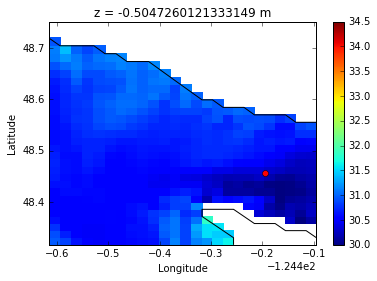

In [5]:
j=10; i=20
t=0
d=-1
plt.pcolormesh(G['lon_rho'], G['lat_rho'], sal[t,d,:,:],vmin=30,vmax=34.5)
plt.colorbar()
plt.plot(G['lon_rho'][j,i], G['lat_rho'][j,i], 'ro')
plt.contour(G['lon_rho'], G['lat_rho'],G['h']*G['mask_rho'], [0],colors='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('z = {} m'.format(z_rho[d,j,i]))

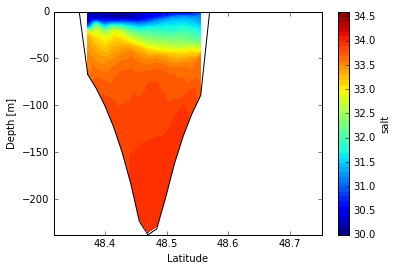

In [6]:
lat_mesh,_ = np.meshgrid(G['lat_rho'][:,i ],z_rho[:,j,i])
lines = np.arange(30,34.6,.1)
plt.contourf(lat_mesh, z_rho[:,:,i], sal[t,:,:,i],lines)
cbar=plt.colorbar()
plt.plot(G['lat_rho'][:,i], -G['h'][:,i]*G['mask_rho'][:,i], 'k')
cbar.set_label('salt')
plt.ylabel('Depth [m]')
plt.xlabel('Latitude')

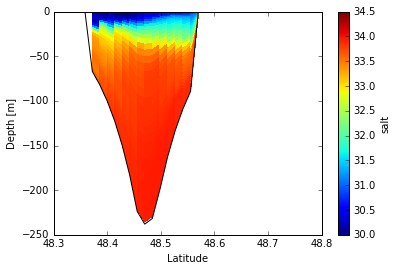

In [7]:
lat_mesh,_ = np.meshgrid(G['lat_rho'][:,i ],z_rho[:,j,i])
plt.pcolormesh(G['lat_rho'][:,i ], z_rho[:,:,i], sal[t,:,:,i],vmin=30,vmax=34.5)
cbar=plt.colorbar()
plt.plot(G['lat_rho'][:,i], -G['h'][:,i]*G['mask_rho'][:,i], 'k')
cbar.set_label('salt')
plt.ylabel('Depth [m]')
plt.xlabel('Latitude')

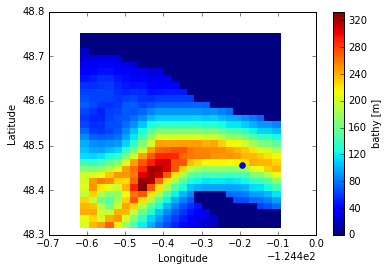

In [8]:
plt.pcolormesh(G['lon_rho'], G['lat_rho'], G['h']*G['mask_rho'])
cbar=plt.colorbar()
plt.plot(G['lon_rho'][j,i], G['lat_rho'][j,i], 'bo')
cbar.set_label('bathy [m]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')